# Качество на храната

### Ива Семкова, 2201321049, Софтуерно инженерство, II курс

## Въведение

В епоха, в която здравословните избори и хранителната осведоменост придобиват изключително значение, качеството на храната, която консумираме, играе ключова роля в формирането на нашето общо благополучие. Този проект се насочва към подробното проучване на света на данните за храна, метично анализиране и почистване на набор от данни, който включва различни аспекти на хранителното качество.

Отделът за инспекция на храните извършва редовни проверки на качеството на храните в различни ресторанти в града. Това е добре документирана процедура и с течение на времето са създадени значителни данни от тези инспекции.

Отделът по инспекция би искал да предвиди къде трябва да се фокусира най-много по отношение на следващата си програма за инспекция, така че да може най-ефективно да оптимизира своето време, за да улови най-лошите нарушители. Може ли миналата инспекция или някакви данни, които са събрани, да предвидят кой обект ще изпадне в неуспех или успех.

Това е подмножество от този набор от данни с информация за проверките на качеството на храните, извършени в хиляди съоръжения, които сервират храна в множество градове. Целта е да предскажем дали дадено съоръжение ще премине или не проверката въз основа на редица фактори.

Импортираме необходимите библиотеки.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, ConfusionMatrixDisplay

Създаваме променлива file_path и в нея съхраняваме пътя към Excel файлът, от който ще се четат данните.

In [ ]:
file_path = '/content/food_quality.xlsx'

Използваме библиотеката Pandas за четене на данни от Excel файл. Прочетените данни се съхраняват в променливата `food_quality`.

In [ ]:
food_quality = pd.read_excel(file_path)

Входни променливи:
1. ID - Идентификатор на инспекцията
2. Date - Датата, на която е направена инспекцията в обекта
3. LicenseNo - Номер на лиценза
4. FacultyID - Идентификатор на обекта
5. FacultyName - Име на обекта
6. Type - Видът на обекта, който се проверява
7. Street - Улицата, където се намира обектът
8. City - Града, в който се намира обектът
9. State - Щатът, в който се намира обектът
10. LocationID - Идентификатор на местоположението
11. Reason - причината, поради която е направена проверката
12. SectionViolations - Законите, които са нарушени
13. RiskLevel - Нивото на риск
14. Geo_Loc - Географското местоположение на съоръжението

---

Изходна променлива (въз основа на сензорни данни):

15. Inspection_Results - Резултата от инспекцията:

0:’FACILITY CHANGED’ (Обектът се е подорил)

1:’FAIL’ (Неуспех)

2:’FURTHER INSPECTION REQUIRED’ (Изисква се допълнителен оглед)

3:’INSPECTION OVERRULED’ (Огледът е отменен)

4:’PASS’ (Успех)

5:’PASS(CONDITIONAL)’ (Успех (условен))

6:’SHUT-DOWN’ (Затворен)

In [ ]:
food_quality.head()

,ID,Date,LicenseNo,FacilityID,FacilityName,Type,Street,City,State,LocationID,Reason,SectionViolations,RiskLevel,Geo_Loc,Inspection_Results
0,31103489027986,26-04-2010,4744,8123,7715,RESTAURANT,15522,id-11235901,id_1890134,81876.0,CANVASS,33.0,High,locid16406,4
1,10088999935915,21-06-2009,2973,12268,11664,GROCERY STORE,3057,id-11235901,id_1890134,81862.0,COMPLAINT,33.0,High,locid878,4
2,40148966010272,01-05-2013,18223,1112,969,RESTAURANT,14988,id-11235901,id_1890134,81883.0,CANVASS,NaN,High,locid3368,6
3,37157708563676,28-09-2015,20825,20007,19115,RESTAURANT,3661,id-11235901,id_1890134,81859.0,CANVASS RE-INSPECTION,31.0,Medium,locid11839,4
4,47478049564374,09-12-2015,2136,16867,10409,RESTAURANT,7876,id-11235901,id_1890134,81886.0,COMPLAINT,30.0,High,locid12264,4


Предоставяме обобщена информация за DataFrame, включително броя редове и колони, и типовете данни във всяка колона.

In [ ]:
food_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147443 entries, 0 to 147442
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  147443 non-null  int64  
 1   Date                147443 non-null  object 
 2   LicenseNo           147443 non-null  int64  
 3   FacilityID          147443 non-null  int64  
 4   FacilityName        147443 non-null  int64  
 5   Type                143958 non-null  object 
 6   Street              147443 non-null  int64  
 7   City                147443 non-null  object 
 8   State               147443 non-null  object 
 9   LocationID          147408 non-null  float64
 10  Reason              147443 non-null  object 
 11  SectionViolations   108375 non-null  float64
 12  RiskLevel           147443 non-null  object 
 13  Geo_Loc             147443 non-null  object 
 14  Inspection_Results  147443 non-null  int64  
dtypes: float64(2), int64(6), object(7)

## Изчистване на колони с липсващи данни

Виждаме броя на липсващите (null) стойности във всяка колона на food_quality.

In [ ]:
food_quality.isnull()

,ID,Date,LicenseNo,FacilityID,FacilityName,Type,Street,City,State,LocationID,Reason,SectionViolations,RiskLevel,Geo_Loc,Inspection_Results
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147438,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
147439,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
147440,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
147441,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Разбираме, че има няколко колони с липсващи данни. Трябва да ги изчистим.

In [ ]:
food_quality.isnull().sum()

ID                        0
Date                      0
LicenseNo                 0
FacilityID                0
FacilityName              0
Type                   3485
Street                    0
City                      0
State                     0
LocationID               35
Reason                    0
SectionViolations     39068
RiskLevel                 0
Geo_Loc                   0
Inspection_Results        0
dtype: int64

Създаваме променлива, в която да пазим колоните с липсващи данни.

In [ ]:
missing_val_coll = ["LocationID", "SectionViolations", "Type"]

Създаваме цикъл, за да замести липсващите стойности във всеки стълб на food_quality със средната стойност на съответния стълб. За всяка колона в списъка `missing_val_coll`, програмата изчислява средната стойност и замества липсващите стойности с нея.

Създаваме цикъл, който преминава през всяка от посочените колони. Всеки път се проверява дали текущата колона съдържа числови данни. Ако това е така, се изчислява средната стойност (`mean`) за тази колона, и липсващите стойности в нея се попълват с тази средна стойност. Ако колоната съдържа текстови данни, се изчислява стойността, която се среща най-често (`mode`), и липсващите стойности се заместват с нея.

Този процес се извършва за всяка от избраните колони, гарантирайки, че липсващите стойности са адекватно обработени в зависимост от типа на данните в съответната колона.

In [ ]:
for col in missing_val_coll:
    # Проверяваме дали текущата колона съдържа числови данни
    if pd.api.types.is_numeric_dtype(food_quality[col]):
        mean = food_quality[col].mean()
        food_quality[col].fillna(mean, inplace=True)
    else:
        mode_val = food_quality[col].mode()[0]
        food_quality[col].fillna(mode_val, inplace=True)

Проверяваме дали сме премахнали липсващите стойности (NaN) във всяка колона на food_quality. Разбираме, че броят на липсващите стойности във всяка колона е 0. Този резултат потвърждава, че всички липсващи стойности са успешно обработени и заменени със съответните статистически параметри, като средно аритметичните стойности за числовите колони и модата за текстовите колони.

In [ ]:
food_quality.isnull().sum()

ID                    0
Date                  0
LicenseNo             0
FacilityID            0
FacilityName          0
Type                  0
Street                0
City                  0
State                 0
LocationID            0
Reason                0
SectionViolations     0
RiskLevel             0
Geo_Loc               0
Inspection_Results    0
dtype: int64

Създаваме нова променлива `fq`, която става псевдоним на съществуващата променлива `food_quality`. Правим го, за по-кратко и удобно използване на променливата без необходимостта да се изписва цялото й име при всяко обръщение.

In [ ]:
fq = food_quality



---



## Създаване на диаграми

Получаваме статистика за разпределението на различните резултати от инспекциите в нашата колона 'Inspection_Results'. Този анализ е от съществено значение, тъй като ни предоставя представа за баланса между различните видове резултати, които могат да се появят след инспекцията. Виждането на това разпределение може да ни помогне да разберем общата тенденция и структура на резултатите от инспекциите в нашите данни.

In [ ]:
fq['Inspection_Results'].value_counts()

4    79453
1    28456
5    20631
6    12691
3     4747
2     1420
0       45
Name: Inspection_Results, dtype: int64

Създаваме бар-графика, използвайки библиотеката Matplotlib, която представя броя на срещанията на всяка уникална стойност в колоната "Inspection_Results". Визуализацията помага бързо да засечем разпределението на резултатите и да обобщим информацията относно резултатите от инспекциите.

С помощта на `value_counts()`, създадохме списък от уникалните резултати и броя на техните срещания в колоната 'Inspection_Results'. После, сортирахме този списък, за да го представим във възходящ ред, като използвахме библиотеката Matplotlib, което прави визуализацията по-четлива.

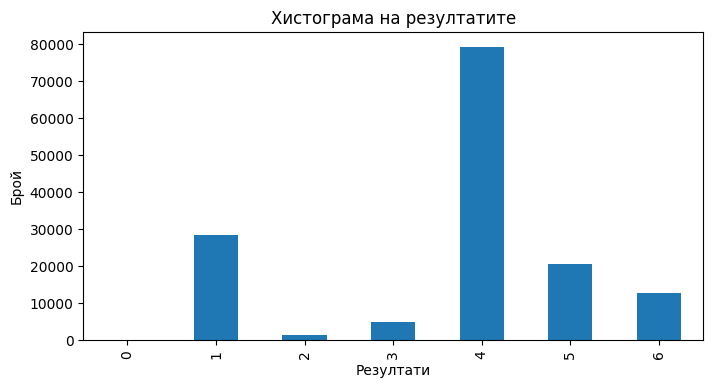

In [ ]:
results = fq['Inspection_Results'].value_counts()

sorted_results = results.sort_index(ascending=True)

plt.figure(figsize=(8, 4))
sorted_results.plot(kind='bar')

plt.xlabel('Резултати')
plt.ylabel('Брой')
plt.title('Хистограма на резултатите')

plt.show()

Нека направим и кръгова диаграма, за да покажем резултатите в проценти.

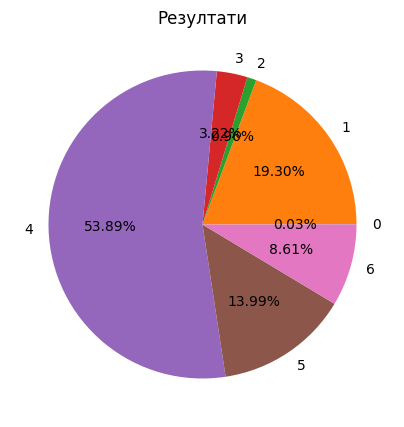

In [ ]:
results = fq.groupby('Inspection_Results').size()
plt.figure(figsize=(5, 5))
plt.pie(results, labels=results.index, autopct="%.2f%%")
plt.title("Резултати")
plt.show()

**Възможни резултати:**

0:’FACILITY CHANGED’ (Обектът се е подорил)

1:’FAIL’ (Неуспех)

2:’FURTHER INSPECTION REQUIRED’ (Изисква се допълнителен оглед)

3:’INSPECTION OVERRULED’ (Огледът е отменен)

4:’PASS’ (Успех)

5:’PASS(CONDITIONAL)’ (Успех (условен))

6:’SHUT-DOWN’ (Затворен)

**Можем да видим, че повечето обекти са преминали инспекцията успешно!**

**Но само 0.3% са се подобрили!**



---



Виждаме броя на всеки уникален тип обект в колоната 'Type'.

In [ ]:
fq['Type'].value_counts()

RESTAURANT                      101831
GROCERY STORE                    18811
SCHOOL                            9140
CHILDREN'S SERVICES FACILITY      2320
BAKERY                            2212
                                 ...  
RETAIL WINE/WINE BAR                 1
HERBALIFE STORE                      1
CONVENIENCE/GAS STATION              1
WHOLESALE & RETAIL                   1
AFTER SCHOOL CARE                    1
Name: Type, Length: 409, dtype: int64

Ще направим диаграма за четерите най-често срещани типа обекти, които са инспектирани.

Създаваме списък selected_types, който съдържа четири определени типа: ресторанти, магазини, училища и детски заведения (тъй като те са най-често срещаните). След това създаваме нов DataFrame - selected_df, като избираме само редове от оригиналния DataFrame fq, в които типът на обекта се съдържа в списъка с избраните типове.

След като сме създали този подмножество, желаем да разберем колко обекта имаме от всяка от избраните категории. Използваме `.value_counts()`, за да получим броя на всяко уникално избрано значение в колоната 'Type' на selected_df. Резултатът е Series, наречен type_counts.

Накрая, сортираме броя на обектите за всяка категория във възходящ ред (по азбучен ред), създавайки нов Series sorted_types. Този анализ визуализираме чрез бар-диаграма с помощта на Matplotlib.

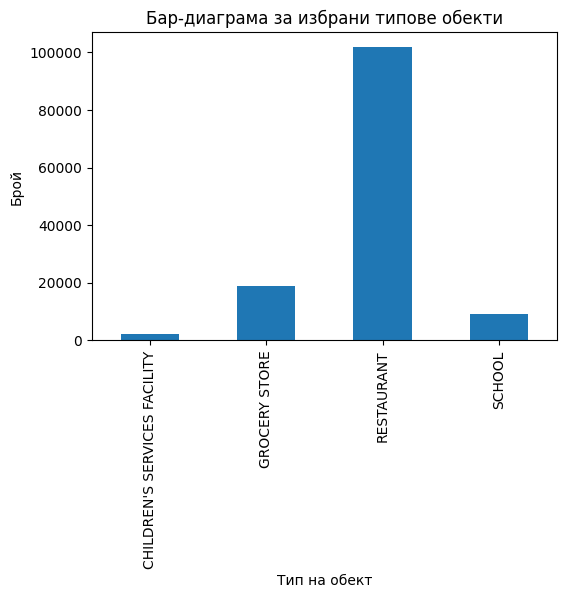

In [ ]:
selected_types = ['RESTAURANT', 'GROCERY STORE', 'SCHOOL', "CHILDREN'S SERVICES FACILITY"]

selected_df = fq[fq['Type'].isin(selected_types)]

type_counts = selected_df['Type'].value_counts()
sorted_types = type_counts.sort_index(ascending=True)

plt.figure(figsize=(6, 4))
sorted_types.plot(kind='bar')

plt.xlabel('Тип на обект')
plt.ylabel('Брой')
plt.title('Бар-диаграма за избрани типове обекти')

plt.show()

Правим същото и за колоната 'RiskLevel'. Виждаме броя на всеки уникален тип обект в колоната. Този резултат предоставя обобщена информация за броя срещания на всяко от рисковите нива.

In [ ]:
fq['RiskLevel'].value_counts()

High         105786
Medium        28804
Low           12832
Uncertain        21
Name: RiskLevel, dtype: int64

Създаваме бар-диаграма, която илюстрира разпределението на нивата на риск. Първата част от кода изчислява броя на всяко уникално ниво на риск в колоната. След това създаваме нова фигура с размери 7 по широчина и 4 по височина, като тази фигура ще бъде основата на бар-диаграмата.

Извикваме методът `plot(kind='bar')` върху risk_level_counts, което рисува барове, представляващи различните нива на риск. Следващите три реда служат за добавяне на имена на осите и заглавие към диаграмата. Накрая, plt.show() се използва за показване на генерираната бар-диаграма.

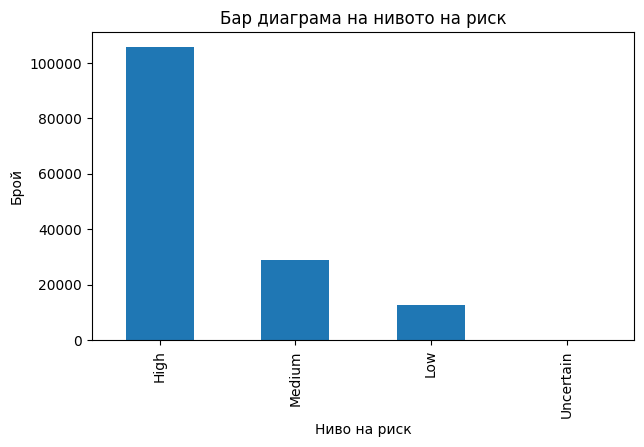

In [ ]:
risk_level_counts = fq['RiskLevel'].value_counts()

plt.figure(figsize=(7, 4))
risk_level_counts.plot(kind='bar')

plt.xlabel('Ниво на риск')
plt.ylabel('Брой')
plt.title('Бар диаграма на нивото на риск')

plt.show()

Създаваме хистограма, която илюстрира разпределението на нивата на риск за два различни типа заведения - ресторанти и училища. Първите два реда създават филтри, които извличат информация само за ресторанти и училища от DataFrame fq.

След това, с помощта на `plt.hist`, създаваме хистограми за нивата на риск за всяка от тези категории. Хистограмите са прозрачни (`alpha=0.6`) и с различни цветове (зелен за ресторанти и червен за училища). Имената на осите и заглавието на диаграмата се добавят, като се отразява броя на нивата на риск и типът на заведението. Накрая, диаграмата се показва с `plt.show()`.

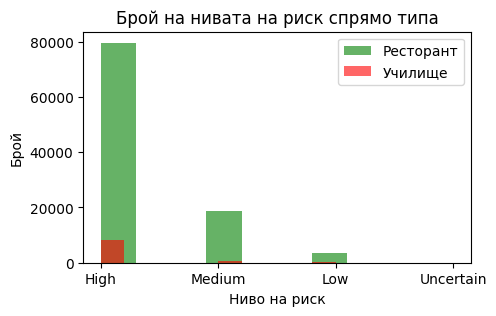

In [ ]:
restaurant_filter = fq["Type"] == "RESTAURANT"
school_filter = fq["Type"] == "SCHOOL"

plt.figure(figsize=(5, 3))

plt.hist(fq[restaurant_filter]["RiskLevel"], alpha=0.6, color='g', label='Restaurant')
plt.hist(fq[school_filter]["RiskLevel"], alpha=0.6, color='r', label='School')

plt.xlabel('Ниво на риск')
plt.ylabel('Брой')
plt.title('Брой на нивата на риск спрямо типа')

plt.legend(['Ресторант', 'Училище'])

plt.show()



---



Ще покажем кръгова диаграма за трите най-често срещани типа.

Представяме информация за инспекции в заведения от тип "RESTAURANT", "GROCERY STORE" и "SCHOOL". Първият ред отделя само тези три типа заведения в нов DataFrame с име filtered_df. След това, кодът използва `groupby` и `size` за да преброи броя на инспекциите за всеки отделен тип заведение.

Следващите редове отговарят за създаването на кръгова диаграма (pie chart), която визуализира процентното разпределение на броя инспекции спрямо типа заведение. `plt.gca().set_aspect("equal")` гарантира, че диаграмата е правилна и сравнително кръгла. `plt.pie` се използва за създаването на кръговата диаграма, като използва броя инспекции (`num_by_type`). Форматирането на процентите за всяка секция се постига с параметъра `autopct`.

Накрая, `plt.title` добавя заглавие на диаграмата, описващо темата - "Инспекции спрямо тип". `plt.show()` се използва за да покаже генерираната кръгова диаграма.

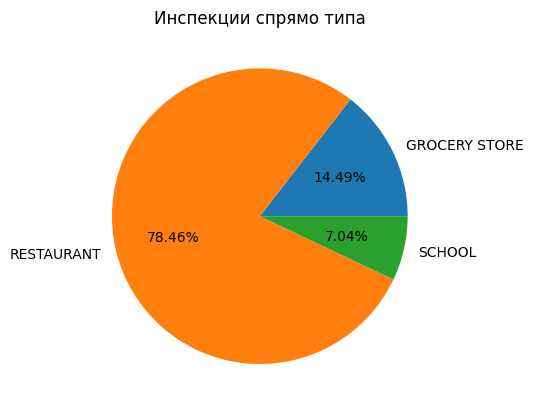

In [ ]:
filtered_df = fq[fq['Type'].isin(['RESTAURANT', 'GROCERY STORE', 'SCHOOL'])]

num_by_type = filtered_df.groupby('Type').size()

plt.gca().set_aspect("equal")

plt.pie(num_by_type, labels=num_by_type.index, autopct="%.2f%%")

plt.title('Инспекции спрямо типа')

plt.show()



---



## Корелации

`fq.corr()` връща корелационна матрица. Този вид матрица предоставя информация за степента на линейна връзка между различните колони в DataFrame. Всеки елемент на матрицата представлява корелационния коефициент между две колони - стойност в интервала [-1, 1].

Стойност 1 показва пълна положителна корелация, което означава, че ако една колона нараства, другата също нараства. Стойност -1 показва пълна отрицателна корелация, което означава, че ако една колона нараства, другата намалява. Стойност 0 показва липса на корелация - промените в една колона не са свързани с промените в друга колона.

In [ ]:
fq.corr()

<ipython-input-38-7236e3d259d9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fq.corr()


,ID,LicenseNo,FacilityID,FacilityName,Street,LocationID,SectionViolations,Inspection_Results
ID,1.000000,-0.001000,-0.002463,-0.002147,-0.000081,-0.000495,0.001032,-0.006987
LicenseNo,-0.001000,1.000000,0.007651,0.004446,-0.008863,-0.003506,-0.035576,-0.042021
FacilityID,-0.002463,0.007651,1.000000,0.917714,-0.017715,0.002109,0.003635,-0.004908
FacilityName,-0.002147,0.004446,0.917714,1.000000,-0.012873,0.003298,0.003615,-0.004162
Street,-0.000081,-0.008863,-0.017715,-0.012873,1.000000,0.015734,0.005700,-0.004127
LocationID,-0.000495,-0.003506,0.002109,0.003298,0.015734,1.000000,0.007226,-0.001861
SectionViolations,0.001032,-0.035576,0.003635,0.003615,0.005700,0.007226,1.000000,0.209115
Inspection_Results,-0.006987,-0.042021,-0.004908,-0.004162,-0.004127,-0.001861,0.209115,1.000000


Създаваме функция, която помага да визуализираме корелационна матрица. Корелационната матрица предоставя информация за връзките между различните колони в данните.

В първата част на функцията изчисляваме корелациите между колоните в DataFrame-а, използвайки метода `.corr()`. След това създаваме нова фигура и оси за визуализация, като задаваме размера на графиката чрез параметъра `figsize=(size, size)`.

След това, използваме метода `.matshow()`, за да визуализираме самата корелационна матрица в графичен формат. Осите на графиката се настройват, така че да отразяват имената на колоните, които съответстват на данните в DataFrame-а.

Така можем да разгледаме и анализираме корелациите между различните данни в данните, което е от съществено значение за разбирането на взаимодействията между тях.

In [ ]:
def plot_corr(dataframe,size=5):
    corr = dataframe.corr()

    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns,rotation = 90)
    plt.yticks(range(len(corr.columns)), corr.columns)

Използваме функцията, за да визуализираме корелационната матрица на нашия DataFrame.

<ipython-input-39-35345cbdceca>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataframe.corr()


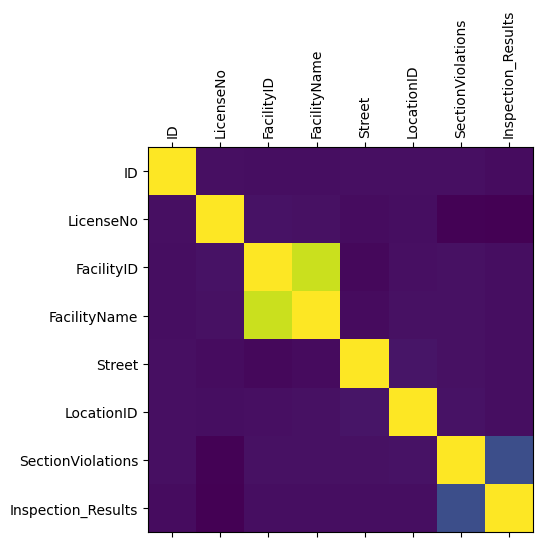

In [ ]:
plot_corr(fq)

Използваме метода `corr()` върху DataFrame `fq`, за да генерираме корелационна матрица. След това прилагаме стилове към тази матрица чрез `style.background_gradient(cmap='coolwarm')`, което създава градиентен ефект върху цветовете на ячеите в матрицата в зависимост от стойностите на корелациите.

In [ ]:
corr = fq.corr()
corr.style.background_gradient(cmap='coolwarm')

<ipython-input-41-26150c205631>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = fq.corr()


,ID,LicenseNo,FacilityID,FacilityName,Street,LocationID,SectionViolations,Inspection_Results
ID,1.000000,-0.001000,-0.002463,-0.002147,-0.000081,-0.000495,0.001032,-0.006987
LicenseNo,-0.001000,1.000000,0.007651,0.004446,-0.008863,-0.003506,-0.035576,-0.042021
FacilityID,-0.002463,0.007651,1.000000,0.917714,-0.017715,0.002109,0.003635,-0.004908
FacilityName,-0.002147,0.004446,0.917714,1.000000,-0.012873,0.003298,0.003615,-0.004162
Street,-0.000081,-0.008863,-0.017715,-0.012873,1.000000,0.015734,0.005700,-0.004127
LocationID,-0.000495,-0.003506,0.002109,0.003298,0.015734,1.000000,0.007226,-0.001861
SectionViolations,0.001032,-0.035576,0.003635,0.003615,0.005700,0.007226,1.000000,0.209115
Inspection_Results,-0.006987,-0.042021,-0.004908,-0.004162,-0.004127,-0.001861,0.209115,1.000000


Виждаме, че `FacilityID` и `FacilityName` имат висока корелация, по-точно `0.916434`. Искаме да премахнем всичко, което има корелация по-висока от 0,7. Така че, трябва да премахнем колона `FacilityID` и да запазим резултата във променлива с име `fq_new`.

In [ ]:
fq_new = fq.drop('FacilityName', axis=1)

In [ ]:
fq_new.head()

,ID,Date,LicenseNo,FacilityID,Type,Street,City,State,LocationID,Reason,SectionViolations,RiskLevel,Geo_Loc,Inspection_Results
0,31103489027986,26-04-2010,4744,8123,RESTAURANT,15522,id-11235901,id_1890134,81876.0,CANVASS,33.000000,High,locid16406,4
1,10088999935915,21-06-2009,2973,12268,GROCERY STORE,3057,id-11235901,id_1890134,81862.0,COMPLAINT,33.000000,High,locid878,4
2,40148966010272,01-05-2013,18223,1112,RESTAURANT,14988,id-11235901,id_1890134,81883.0,CANVASS,24.129153,High,locid3368,6
3,37157708563676,28-09-2015,20825,20007,RESTAURANT,3661,id-11235901,id_1890134,81859.0,CANVASS RE-INSPECTION,31.000000,Medium,locid11839,4
4,47478049564374,09-12-2015,2136,16867,RESTAURANT,7876,id-11235901,id_1890134,81886.0,COMPLAINT,30.000000,High,locid12264,4




---



Ще преобразуваме резултатите от инспекциите в категорични променливи (единици и нули).

Запазваме резултата в променлива с име `fq_ml`. Колоната Inspection_Results ще бъде променена на колони Inspection_Results_1, Inspection_Results_2, Inspection_Results_3, Inspection_Results_4, Inspection_Results_5 и Inspection_Results_6, които ще съдържат единици и нули. По принцип това е отговор на въпроса "Резултата дадения номер ли е?" 1 означава да, а 0 означава не.

In [ ]:
columns_to_encode = ['Inspection_Results']
fq_ml = pd.get_dummies(fq_new, columns=columns_to_encode, drop_first=True)

In [ ]:
fq_ml.head()

,ID,Date,LicenseNo,FacilityID,Type,Street,City,State,LocationID,Reason,SectionViolations,RiskLevel,Geo_Loc,Inspection_Results_1,Inspection_Results_2,Inspection_Results_3,Inspection_Results_4,Inspection_Results_5,Inspection_Results_6
0,31103489027986,26-04-2010,4744,8123,RESTAURANT,15522,id-11235901,id_1890134,81876.0,CANVASS,33.000000,High,locid16406,0,0,0,1,0,0
1,10088999935915,21-06-2009,2973,12268,GROCERY STORE,3057,id-11235901,id_1890134,81862.0,COMPLAINT,33.000000,High,locid878,0,0,0,1,0,0
2,40148966010272,01-05-2013,18223,1112,RESTAURANT,14988,id-11235901,id_1890134,81883.0,CANVASS,24.129153,High,locid3368,0,0,0,0,0,1
3,37157708563676,28-09-2015,20825,20007,RESTAURANT,3661,id-11235901,id_1890134,81859.0,CANVASS RE-INSPECTION,31.000000,Medium,locid11839,0,0,0,1,0,0
4,47478049564374,09-12-2015,2136,16867,RESTAURANT,7876,id-11235901,id_1890134,81886.0,COMPLAINT,30.000000,High,locid12264,0,0,0,1,0,0


Когато извикваме `fq_ml['Inspection_Results_1'].unique()`, ние виждаме уникалните стойности, които тази нова колона може да приеме.

In [ ]:
fq_ml['Inspection_Results_1'].unique()

array([0, 1], dtype=uint8)

Получаваме информация за типовете на данните във всяка от колоните в `fq_ml`.

In [ ]:
fq_ml.dtypes

ID                        int64
Date                     object
LicenseNo                 int64
FacilityID                int64
Type                     object
Street                    int64
City                     object
State                    object
LocationID              float64
Reason                   object
SectionViolations       float64
RiskLevel                object
Geo_Loc                  object
Inspection_Results_1      uint8
Inspection_Results_2      uint8
Inspection_Results_3      uint8
Inspection_Results_4      uint8
Inspection_Results_5      uint8
Inspection_Results_6      uint8
dtype: object

Получаваме списък от уникалните стойности в колоната "Reason" в `fq_ml`, което ни помага да разберем разнообразието от причини за инспекции в нашия набор от данни.

In [ ]:
fq_ml['Reason'].unique()

array(['CANVASS', 'COMPLAINT', 'CANVASS RE-INSPECTION', 'LICENSE',
       'LICENSE RE-INSPECTION', 'SUSPECTED FOOD POISONING',
       'LICENSE-TASK FORCE', 'TAG REMOVAL', 'COMPLAINT RE-INSPECTION',
       'CONSULTATION', 'RECENT INSPECTION', 'SHORT FORM COMPLAINT',
       'SUSPECTED FOOD POISONING RE-INSPECTION', 'COMPLAINT-FIRE',
       'OUT OF BUSINESS', 'TASK FORCE LIQUOR 1475',
       'SHORT FORM FIRE-COMPLAINT'], dtype=object)

В този код използваме mode(), който връща най-често срещаната стойност в колоната "Reason" от fq_ml. Резултатът представлява списък от тази или тези най-често срещани стойности. Разбираме, че CANVASS е най-често срещаната причина за проверка.

In [ ]:
most_common_reason = fq_ml['Reason'].mode()
print(most_common_reason)

0    CANVASS
Name: Reason, dtype: object




---



Задаваме стойности на променливата Y в зависимост от стойността на колоната "Reason" в `fq_ml`. Ако стойността на "Reason" е равна на предварително зададената стойност 'CANVASS'(която разбрахме, че е най-често срещаната), Y приема стойност 1, в противен случай Y приема стойност 0.

In [ ]:
reason_to_check = 'CANVASS'
Y = fq_ml['Reason'].apply(lambda reason: 1 if reason == reason_to_check else 0)

In [ ]:
print(Y)

0         1
1         0
2         1
3         0
4         0
         ..
147438    0
147439    0
147440    1
147441    0
147442    0
Name: Reason, Length: 147443, dtype: int64




---



Изваждаме колоната "Reason" от `fq_ml` и след това стандартизираме само числовите колони в останалата част от данните. След стандартизацията, числовите колони се обединяват с нечисловите колони, създавайки нов DataFrame със стандартизирани данни. Този процес помага за подготовката на данните преди те да бъдат използвани за машинно обучение, като ги преобразува във формат, който е по-подходящ за алгоритмите за обучение.

In [ ]:
X = fq_ml.drop('Reason',axis=1)

In [ ]:
# Изключваме колоните, които не са от числов тип (например, 'Date')
numeric_columns = X.select_dtypes(include=np.number).columns
X_numeric = X[numeric_columns]

# Стандартизираме само числовите колони
scaler = StandardScaler()
X_standard_numeric = scaler.fit_transform(X_numeric)

# Създаваме DataFrame със стандартизираните числови колони
X_standard_numeric_df = pd.DataFrame(X_standard_numeric, columns=numeric_columns)

# Обединяваме стандартизираните числови колони с нечисловите колони
X_standard = pd.concat([X_standard_numeric_df, X.drop(numeric_columns, axis=1)], axis=1)

Използваме функцията `pd.get_dummies` за преобразуване на категориалната променлива Y в двоични (dummy) колони (променливи). След това избираме само числовите колони от DataFrame X и ги стандартизираме, като се използва `StandardScaler`.

In [ ]:
Y_encoded = pd.get_dummies(Y, drop_first=True)

In [ ]:
numeric_columns = X.select_dtypes(include=np.number).columns
X_numeric = X[numeric_columns]

scaler = StandardScaler()
scaler.fit(X_numeric)
X_standard = scaler.transform(X_numeric)

## Разделяне на данните на набори за тестване и обучение както и оценка на модела.

Наборът от данни отделен за трениране ще бъде този, който ще използваме, за да обучим нашия модел. Набора от данни за тестване ще се използва за валидиране на нашия обучен модел.

Ще оставим 20% от данните за тестване. Защото искаме да имаме възпроизводим (еднакъв) изход всеки път, когато зададем random_state=123.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_standard, Y_encoded, test_size=0.2, random_state=123)

In [ ]:
X_train

array([[ 0.12307757, -0.78229201, -0.2463038 , ...,  0.92505461,
        -0.40334805, -0.30688829],
       [ 0.84319074, -0.1440047 , -0.71484793, ..., -1.08101726,
         2.47924837, -0.30688829],
       [ 0.33988242, -0.48049762, -1.37737858, ..., -1.08101726,
        -0.40334805,  3.25851472],
       ...,
       [-1.57232058,  0.73551563, -0.57295039, ...,  0.92505461,
        -0.40334805, -0.30688829],
       [ 0.58413867,  0.29934497, -0.86457165, ..., -1.08101726,
        -0.40334805,  3.25851472],
       [ 0.08261675, -0.06844106, -1.66694706, ..., -1.08101726,
        -0.40334805,  3.25851472]])

In [ ]:
Y_train

,1
139134,1
33984,0
139359,1
68247,1
94835,1
...,...
146449,0
119906,1
17730,1
28030,1


## Линейна регресия - Трениране на модела



Създаваме линейен регресионен модел (`LinearRegression`) и го обучаваме чрез метода `fit` с обучаващите данни `X_train` и целевата променлива `Y_train`. Този процес позволява моделът да научи зависимостите между характеристиките и целевата променлива, което после може да се използва за предсказване на нови стойности.

In [ ]:
regresor = LinearRegression()
regresor.fit(X_train, Y_train)

LinearRegression()

## Проверка точността на модела



Изчисляваме точността на линейния регресионен модел върху тестовите данни (`X_test` и `Y_test`) чрез метода `score` и след това извежда резултата с функцията `print`. Точността представлява степента на съответствие между реалните и предвидените стойности от модела.

In [ ]:
accuracy = regresor.score(X_test, Y_test)
print(accuracy)

0.11065585070346218


Генерираме и извеждаме текстово представяне на точността в проценти. Форматираме резултата чрез използване на метода `format`, като преобразува точността в цяло число и я умножава по 100, за да бъде представена в проценти.

In [ ]:
"Accuracy: {}%".format(int(round(accuracy * 100)))

'Accuracy: 11%'

# Заключение

В този проект, фокусиран върху анализа на данни за хранителното качество в ресторантите, използвахме линеен регресионен модел, за да предскажем резултатите от проверките на храните. След като подготвихме и почистихме данните, използвахме метода на линейната регресия, който ни предостави точност от приблизително 11%.

Резултатите от анализа ни показват, че моделът не постига висока точност при предвиждане на резултатите от инспекциите. Необходимо е допълнително разглеждане на параметрите и оптимизация на модела, за да подобрим предсказателната му способност.

Този проект представлява първата стъпка в разглеждането на данните за хранителното качество и предсказването на резултатите от инспекциите. В бъдеще бихме могли да разширим анализа с допълнителни методи за машинно обучение и да изследваме допълнителни фактори, които могат да влияят на резултатите.